In [74]:
from __future__ import division
from collections import defaultdict
from collections import Counter

import os
import random
import json

In [75]:

source_dir = "C:\\Users\\Molly\\Google Drive\\senior classes\\nlp\\term_project\\book-nlp-master\\book-nlp-master\\data\\originalTexts"
for filename in os.listdir(source_dir):
    print filename
    bookfile = open(source_dir + "\\" + filename, 'r')
    book = bookfile.read()
    bookDict = defaultdict(float)
    for word in book.split():
        bookDict[word] += 1
    counter = Counter(bookDict)
    top_n = counter.most_common(100)
    print top_n
    print

austen.sense.pg161.txt
[('to', 4079.0), ('the', 4002.0), ('of', 3643.0), ('and', 3232.0), ('her', 2135.0), ('a', 2047.0), ('in', 1884.0), ('was', 1773.0), ('I', 1672.0), ('she', 1254.0), ('be', 1249.0), ('that', 1199.0), ('for', 1191.0), ('not', 1182.0), ('as', 1168.0), ('it', 1137.0), ('with', 996.0), ('had', 959.0), ('his', 932.0), ('you', 854.0), ('he', 813.0), ('at', 805.0), ('have', 797.0), ('by', 742.0), ('is', 686.0), ('on', 654.0), ('so', 559.0), ('which', 559.0), ('all', 551.0), ('could', 547.0), ('my', 541.0), ('from', 531.0), ('Mrs.', 520.0), ('would', 499.0), ('but', 491.0), ('very', 487.0), ('no', 475.0), ('their', 461.0), ('him', 430.0), ('been', 425.0), ('were', 420.0), ('they', 415.0), ('any', 415.0), ('or', 408.0), ('than', 362.0), ('every', 358.0), ('more', 357.0), ('what', 354.0), ('this', 351.0), ('Elinor', 349.0), ('your', 344.0), ('said', 342.0), ('an', 340.0), ('such', 336.0), ('will', 333.0), ('them', 302.0), ('must', 284.0), ('only', 280.0), ('much', 257.0), ('

In [76]:
json_filename = "C:\\Users\\Molly\\Google Drive\\senior classes\\nlp\\term_project\\book-nlp-master\\book-nlp-master\\data\\output\\rowling2\\chamber.book"
#json_filename = "C:\\Users\\Molly\\Google Drive\\senior classes\\nlp\\term_project\\book-nlp-master\\book-nlp-master\\data\\output\\dickens\\book.id.book"
#json_filename = "C:\\Users\\Molly\\Google Drive\\senior classes\\nlp\\term_project\\book-nlp-master\\book-nlp-master\\data\\output\\twain\\book.id.book"
#json_filename = "C:\\Users\\Molly\\Google Drive\\senior classes\\nlp\\term_project\\book-nlp-master\\book-nlp-master\\data\\output\\stevenson\\treasure.book"

with open(json_filename) as json_file:
	char_json = json.load(json_file)
print "successfully loaded json"

successfully loaded json


In [91]:
# dictionary of lists of character attributes, indexed by name (i.e. character's "bag of words")
characters = {}

import nltk

# TODO: add stopword removal (this is temporary, pull words from a file or something?)
stopwords = stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("said")
#print stopwords

for character in char_json["characters"]:
    # TODO: throw out characters that are mentioned less than 3 times (play with this threshold?)
    if character["NNPcount"] > 10:
        char_name = character["names"][0]['n']
        print char_name
        characters[char_name] = []
        for word_dict in character["patient"]:
            curWord = word_dict['w']
            if curWord not in stopwords:
                characters[char_name].append(curWord + "_PATIENT")
        for word_dict in character["agent"]:
            curWord = word_dict['w']
            if curWord not in stopwords:
                characters[char_name].append(curWord + "_AGENT")
        for word_dict in character["mod"]:
            curWord = word_dict['w']
            if curWord not in stopwords:
                characters[char_name].append(curWord + "_MOD")
        #TODO: add dialogue features?
        for word_dict in character['speaking']:
            print word_dict['w']
                
    # are things characters possess indicative of their character? Often not, so maybe exclude
# 	for word_dict in character["poss"]:
# 		characters[char_name].append(word_dict['w'] + "_POSS")

texts = [None for i in range(len(characters))]
names = defaultdict(float)
i = 0
for key, value in characters.iteritems():
	print str(key) + ": " + str(value)
	texts[i] = value
	names[key] = i
	i += 1
	print

Fawkes
`` that 's the old school Sorting Hat - '' 
`` LEAVE THE BIRD ! LEAVE THE BIRD ! THE BOY IS BEHIND YOU . YOU CAN STILL SMELL HIM . KILL HIMI '' 
`` I 've looked forward to coming to Hogwarts ever since B-Bill came and n-now I 'll have to leave and -- w-what 'll Mum and Dad say ? '' 
`` He 's in a bad way . Come and see . '' 
Dobby
`` Oh , yes , sir , '' 
`` I-Tarry Potter is humble and modest , '' 
`` Ah , speak not the name , sir ! Speak not the name ! '' 
`` that Harry Potter met the Dark Lord for a second time just weeks ago ... that Harry Potter escaped Yet again . '' 
`` No , no , no , '' 
`` There is a plot , Harry Potter . A plot to make most terrible things happen at Hogwarts School of Witchcraft and Wizardry this year , '' 
`` Who 's plotting them ? '' 
`` He has n't got a brother , has he ? '' 
`` I mean , there 's Dumbledore , for one thing - you know who Dumbledore is , do n't you ? '' 
`` Albus Dumbledore is the greatest headmaster Hogwarts has ever had . Dobby know

In [78]:
from gensim import corpora, models, similarities 
 
# create Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

# create bag of words model to perform analysis
corpus = [dictionary.doc2bow(text) for text in texts]

numtopics = 20

lda = models.LdaModel(corpus, num_topics=numtopics, 
                            id2word=dictionary, 
                            update_every=5, 
                            chunksize=100, 
                            passes=100)


In [79]:
print(lda.show_topics())

[u'0.013*shouted_AGENT + 0.010*looked_AGENT + 0.010*got_AGENT + 0.007*looking_AGENT + 0.007*came_AGENT + 0.007*spoke_AGENT + 0.007*let_AGENT + 0.007*standing_AGENT + 0.007*tell_PATIENT + 0.007*hear_PATIENT', u'0.013*looked_AGENT + 0.007*thought_AGENT + 0.007*went_AGENT + 0.007*started_AGENT + 0.007*stared_AGENT + 0.007*watching_PATIENT + 0.007*added_AGENT + 0.007*wanted_AGENT + 0.007*jump_AGENT + 0.007*raise_wand_AGENT', u'0.015*missed_PATIENT + 0.015*written_AGENT + 0.015*famous_MOD + 0.008*know_it_AGENT + 0.008*wished_AGENT + 0.008*hear_voice_AGENT + 0.008*seen_AGENT + 0.008*found_AGENT + 0.008*see_PATIENT + 0.008*made_AGENT', u'0.020*told_PATIENT + 0.019*looked_AGENT + 0.010*joined_PATIENT + 0.010*visit_PATIENT + 0.010*came_AGENT + 0.010*let_AGENT + 0.009*sat_AGENT + 0.009*asked_PATIENT + 0.007*talking_AGENT + 0.007*exchange_look_AGENT', u'0.026*looked_AGENT + 0.018*thought_AGENT + 0.017*knew_AGENT + 0.016*felt_AGENT + 0.016*told_PATIENT + 0.012*tried_AGENT + 0.011*heard_AGENT + 0.0

In [80]:
import numpy as np

# topics_matrix = lda.show_topics(num_topics=20, formatted=False, num_words=50)
# topics_matrix = np.array(topics_matrix)

# topic_words = topics_matrix[:,:,1]
# for i in topic_words:
#     print count
#     print([str(word) for word in i])
#     print()

for i in range(0, numtopics):
    print i
    print lda.show_topic(i, 30)
    print

0
[(0.02073639440301878, u'turned_AGENT'), (0.018108871105331648, u'looking_AGENT'), (0.017917552753999817, u'stepped_AGENT'), (0.016442847388789698, u'moved_AGENT'), (0.013996790404724468, u'whispered_AGENT'), (0.012095958267299376, u'looked_AGENT'), (0.010404904377250957, u'went_AGENT'), (0.0097512390124743359, u'began_AGENT'), (0.0087810373469417013, u'hissed_AGENT'), (0.008099041028555928, u'followed_PATIENT'), (0.008083140531223271, u'pointed_AGENT'), (0.0080281479871683638, u'have_time_AGENT'), (0.0068586224056644465, u'shouted_AGENT'), (0.0065651645926189427, u'stood_AGENT'), (0.006229898736834532, u'stay_AGENT'), (0.0062298987358307177, u'cried_AGENT'), (0.006229898690492233, u'do_what_AGENT'), (0.0062298960972259482, u'exchange_look_AGENT'), (0.0062012913370535789, u'able_MOD'), (0.0061563510057364304, u'swept_AGENT'), (0.0060186769182571428, u'noticed_AGENT'), (0.0059725285770661401, u'backed_AGENT'), (0.0059480712520213683, u'trying_AGENT'), (0.0059441032621252122, u'paused_

In [81]:
topic_matrix = [[0 for i in range(numtopics)] for namekey in names]
print len(topic_matrix)
i = 0
for namekey in names:
    print str(namekey) + " topic distribution: "
    for (key, value) in lda[corpus[names[namekey]]]:
        topic_matrix[i][key] = value
    i+=1
    print lda[corpus[names[namekey]]]

46
Fang topic distribution: 
[(18, 0.94999999974313265)]
Lord Voldemort topic distribution: 
[(12, 0.94722222205399542)]
Mr. Weasley topic distribution: 
[(1, 0.98207547161705966)]
Dudley topic distribution: 
[(15, 0.96607142854238315)]
Nick topic distribution: 
[(10, 0.96935483861543381)]
Wood topic distribution: 
[(10, 0.97031249990119273)]
Tom topic distribution: 
[(8, 0.92083333282342972)]
Goyle topic distribution: 
[(3, 0.88124999940055315)]
Ginny topic distribution: 
[(6, 0.90913460403607749), (15, 0.083039308961377956)]
Crabbe topic distribution: 
[(7, 0.92692307657966699)]
Ernie topic distribution: 
[(8, 0.95681818167408783)]
Madam Pomfrey topic distribution: 
[(19, 0.96346153836607362)]
Mrs. Norris topic distribution: 
[(14, 0.95681818177819544)]
McGonagall topic distribution: 
[(11, 0.97888888880298486)]
Fred topic distribution: 
[(15, 0.66497599130927765), (18, 0.31923453497515258)]
Mrs. Weasley topic distribution: 
[(3, 0.98061224481623144)]
Vernon topic distribution: 
[(16

In [82]:
import numpy as np

data = np.array(topic_matrix)

from sklearn.cluster import KMeans
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
clusters = kmeans.labels_.tolist()
print clusters

[2, 2, 2, 8, 9, 9, 0, 4, 2, 5, 0, 2, 6, 7, 8, 4, 2, 2, 2, 2, 5, 6, 1, 0, 4, 3, 1, 2, 3, 2, 7, 3, 5, 1, 4, 0, 8, 2, 8, 7, 2, 2, 8, 6, 2, 2]


In [83]:
dic={}
i=0
for nameKey in names:
    dic[str(nameKey)]=clusters[i]
    i += 1
d=sorted(dic.items(), key=lambda x:x[1])
for name in d:
    print name

('Ernie', 0)
('Tom', 0)
('Malfoy', 0)
('Hedwig', 0)
('Dumbledore', 1)
('Aragog', 1)
('Ron', 1)
('Lord Voldemort', 2)
('Mr. Weasley', 2)
('Ginny', 2)
('Fang', 2)
('Madam Pomfrey', 2)
('Vernon', 2)
('Hogwarts', 2)
('Snape', 2)
('Neville', 2)
('Hermione', 2)
('Harry', 2)
('Lockhart', 2)
('Dursleys', 2)
('Percy', 2)
('Slytherin', 2)
('Mr. Borgin', 2)
('Binns', 3)
('Seamus', 3)
('Hagrid', 3)
('Goyle', 4)
('Mrs. Weasley', 4)
('Arthur', 4)
('Fawkes', 4)
('Crabbe', 5)
('Justin', 5)
('Dean', 5)
('Mrs. Norris', 6)
('Petunia', 6)
('Draco', 6)
('McGonagall', 7)
('Riddle', 7)
('Dobby', 7)
('Dudley', 8)
('Fred', 8)
('Colin', 8)
('George', 8)
('Myrtle', 8)
('Nick', 9)
('Wood', 9)


In [84]:
import pandas as pd
tempNameList = [nameKey for nameKey in names]
charClusts = {'characters': tempNameList, 'clusters': clusters}
frame = pd.DataFrame(charClusts, index = [clusters] , columns = ['character', 'clusters'])

In [85]:
frame['clusters'].value_counts() 

2    16
8     5
4     4
0     4
7     3
6     3
5     3
3     3
1     3
9     2
Name: clusters, dtype: int64

In [86]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

# get euclidean distance between each character's topic vector
dist = euclidean_distances(data, data)

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [87]:
cluster_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'w', 4: 'c', 5: 'm', 6: 'y', 7: 'k', 8: '#d95f02', 9: '#66a61e'}
#set up cluster names using a dict
cluster_names = {0: '0', 
                 1: '1',
                 2: '2', 
                 3: '3', 
                 4: '4',
                 5: '5',
                 6: '6',
                 7: '7',
                 8: '8',
                 9: '9',
                }

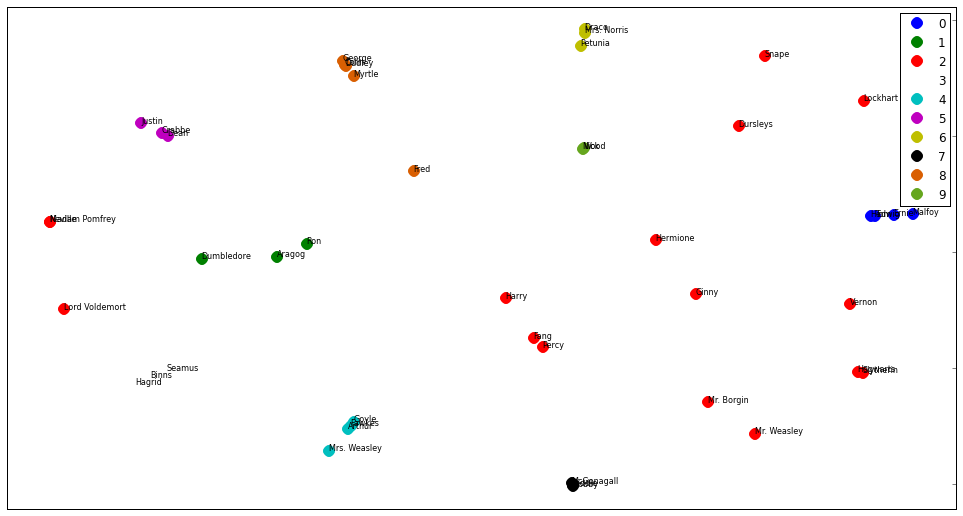

In [88]:
#The following is taken word for word from this tutorial: http://brandonrose.org/clustering

#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=tempNameList)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

In [89]:
#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png', dpi=200)
plt.close()